# CÂU HỎI 3: 
**Tháng nào trong năm 2022 sẽ có mức độ ô nhiễm cao nhất cũng như thành phố nào ô nhiễm nhất trong 12 tháng qua, và sự thay đổi của không khí Việt Nam từ 2017 đến 2022.**


In [1]:
# Gọi các thư viện cần thiết.  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Ý nghĩa của việc đặt câu hỏi**: Nhằm xác định các thành phố, địa điểm ở Việt Nam có mức độ ô nhiễm như thế nào qua từng năm (từ 2017 đến 12 tháng năm 2022), để có thể đưa ra khuyến cáo cho cộng đồng trong việc bảo vệ sức khỏe của bản thân.

## 1. Tháng trong năm 2022 được cho là ô nhiễm nhất tại Việt Nam

Đọc file csv `../data/air_quality_data.csv` và lưu vào biến `df`

In [2]:
df = pd.read_csv('../data/air_quality_data.csv', index_col = 'Unnamed: 0')
df.head() 

,Rank,City,Country,Year_2021,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year_2020,Year_2019,Year_2018,Year_2017
0,1,Bhiwadi,India,106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,NaN
1,2,Ghaziabad,India,102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163.0,106.6,110.2,135.2,144.6
2,3,Hotan,China,101.5,NaN,NaN,158.0,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116.0,91.9
3,4,Delhi,India,96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,Jaunpur,India,95.3,182.2,143.5,91.0,70.0,51.1,40.7,33.5,34.2,36.8,75.7,196.0,195.7,NaN,NaN,NaN,NaN


Lấy những địa điểm thuộc quốc gia Việt Nam

In [3]:
df_Vietnam = df[df['Country'] == 'Vietnam']
df_Vietnam.head() 

,Rank,City,Country,Year_2021,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year_2020,Year_2019,Year_2018,Year_2017
184,285,Pho Moi,Vietnam,36.9,93.4,42.6,48.7,28.4,28.3,41.2,26.3,22.3,26.2,27.5,29.0,35.7,NaN,NaN,NaN,NaN
200,300,Hanoi,Vietnam,36.2,67.1,41.7,36.8,29.7,22.0,19.9,18.9,21.8,25.1,31.5,45.2,74.7,37.9,46.9,40.8,45.8
339,214,Thanh Pho Thai Nguyen,Vietnam,40.8,110.8,34.1,33.8,20.3,29.2,32.8,33.5,28.5,34.3,30.9,44.2,86.3,NaN,NaN,NaN,NaN
384,235,Cho,Vietnam,39.3,69.1,37.4,28.8,19.7,19.5,29.7,30.3,29.0,33.2,34.3,55.4,91.8,NaN,NaN,NaN,NaN
422,473,Ha Tinh,Vietnam,30.0,74.2,35.8,42.8,30.2,23.2,11.5,9.4,12.9,15.5,NaN,NaN,NaN,33.4,NaN,NaN,NaN


Ta kiểm tra dữ liệu của file có đầy đủ hay không, thiếu gì hay không và tìm được min, max hay không ?

In [4]:
def get(col):
    NaNValue = col.isna().sum()
    valu1 = col.dropna()
    x = []
    x.append((NaNValue/len(col))*100)
    x.append(np.percentile(valu1, 0))
    x.append(np.percentile(valu1, 25))
    x.append(np.percentile(valu1, 50))
    x.append(np.percentile(valu1, 75))
    x.append(np.percentile(valu1, 100))
    x.append(np.mean(valu1))
    return np.array(x).round(1)

index_info=["missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max", "mean"]
dict_info = {}
for i in df_Vietnam.columns:
    if df_Vietnam[i].dtype in [np.float32, np.float64]:
        dict_info[i] = get(df_Vietnam[i])   
num_col_info_df = pd.DataFrame(dict_info, index_info)
num_col_info_df

,Year_2021,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year_2020,Year_2019,Year_2018,Year_2017
missing_ratio,0.0,13.3,13.3,6.7,0.0,0.0,0.0,0.0,0.0,0.0,6.7,6.7,6.7,60.0,73.3,86.7,86.7
min,10.7,11.6,14.6,9.8,6.0,4.3,5.7,4.4,4.8,6.2,7.0,7.9,10.8,14.8,25.3,26.9,23.6
lower_quartile,17.8,24.8,25.2,19.8,17.6,13.3,10.6,8.8,9.6,10.1,14.1,19.8,26.8,22.0,25.8,30.4,29.2
median,23.0,42.1,34.1,27.6,20.3,19.5,15.7,10.9,12.2,12.3,19.8,27.7,34.2,23.2,27.2,33.8,34.7
upper_quartile,33.1,74.2,37.4,35.4,28.2,23.2,19.0,16.2,17.5,20.3,26.6,33.2,39.9,31.1,33.2,37.3,40.2
max,40.8,110.8,43.6,48.7,30.2,29.2,41.2,33.5,29.0,34.3,34.3,55.4,91.8,37.9,46.9,40.8,45.8
mean,24.5,54.4,31.3,27.8,21.7,18.2,17.4,14.2,14.3,15.8,20.2,28.6,41.1,25.8,31.7,33.8,34.7


**NHẬN XÉT:** 
- Ta thấy dữ liệu của năm 2017 đến năm 2020 bị mất rất nhiều. 
- Trong 12 tháng, trung bình giữa các địa điểm trãi dài khắp Việt Nam thì ta thấy 3 tháng 7, 8, 9 là 3 tháng trong lành nhất, và đứng đầu là tháng 8. Và 3 tháng có mật độ cao nhất là tháng 12, 1, 2. Trong đó tháng 1 là tháng ô nhiễm nhất trong năm.

**GIẢI THÍCH:**
- Nguyên nhân có thể do quá trình thu thập dữ liệu ô nhiễm tại các địa điểm đó của ở Việt Nam chưa được phổ biến nên không có thông tin gì nên sẽ không có dữ liệu trong bảng.
- Tháng 1 là tháng ô nhiễm nhất có lẽ là đang bước vào giai đoạn cao điểm, các công trình xây dựng hoạt động liên tục. Việc nâng cấp, sửa chữa cầu đường, nhà cửa cùng lưu lượng phương tiện giao thông ở mức cao là 2 nguyên nhân chính dẫn đến tình trạng nồng độ bụi mịn trong không khí tăng.

### Ta sẽ không xét các năm 2017 - 2020:
Vì tỉ lệ mất mát dữ liệu quá lớn, sẽ không phù hợp lắm cho quá trình đánh giá, chất lượng ở không khí Việt Nam

In [5]:
df_from_2021_Vietnam = df_Vietnam.drop(['Country','Year_2020', 'Year_2019', 'Year_2018', 'Year_2017'], axis = 1)
df_from_2021_Vietnam.head()

,Rank,City,Year_2021,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
184,285,Pho Moi,36.9,93.4,42.6,48.7,28.4,28.3,41.2,26.3,22.3,26.2,27.5,29.0,35.7
200,300,Hanoi,36.2,67.1,41.7,36.8,29.7,22.0,19.9,18.9,21.8,25.1,31.5,45.2,74.7
339,214,Thanh Pho Thai Nguyen,40.8,110.8,34.1,33.8,20.3,29.2,32.8,33.5,28.5,34.3,30.9,44.2,86.3
384,235,Cho,39.3,69.1,37.4,28.8,19.7,19.5,29.7,30.3,29.0,33.2,34.3,55.4,91.8
422,473,Ha Tinh,30.0,74.2,35.8,42.8,30.2,23.2,11.5,9.4,12.9,15.5,NaN,NaN,NaN


## Trực quan hóa 12 tháng trong năm 2022 với các địa điểm ở Việt Nam
Gợi ý: Dùng heatmap (seaborn)

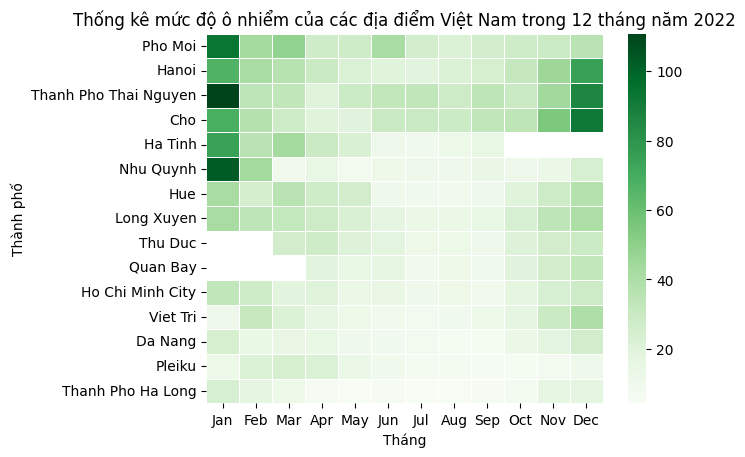

In [6]:
sns.heatmap(data  = df_Vietnam.iloc[:, 4:16], 
            xticklabels = df_Vietnam.columns[4:16],
            yticklabels = df_Vietnam['City'].values,
            linewidths = 0.5, cmap = "Greens")

plt.title('Thống kê mức độ ô nhiểm của các địa điểm Việt Nam trong 12 tháng năm 2022')
plt.xlabel('Tháng')
plt.ylabel('Thành phố')
plt.show()

Dùng heatmap để biểu, vì heatmap mang lại cái nhìn tổng quan về mức độ biến động ô nhiễm ở các địa điểm của Việt Nam trong 12 tháng năm 2022.

## 2. Thành phố có nhiều lần có mức độ ô nhiễm cao nhất và thấp nhất được thống kê trong năm 2022

Dùng biểu đồ cột để biểu diễn các địa điểm có số lần đạt mức độ ô nhiễm và trong lành nhiều nhất, giúp cho ta dễ so sánh sự khác nhau (nhiều hay ít) giữa các địa điểm trong nước hơn.

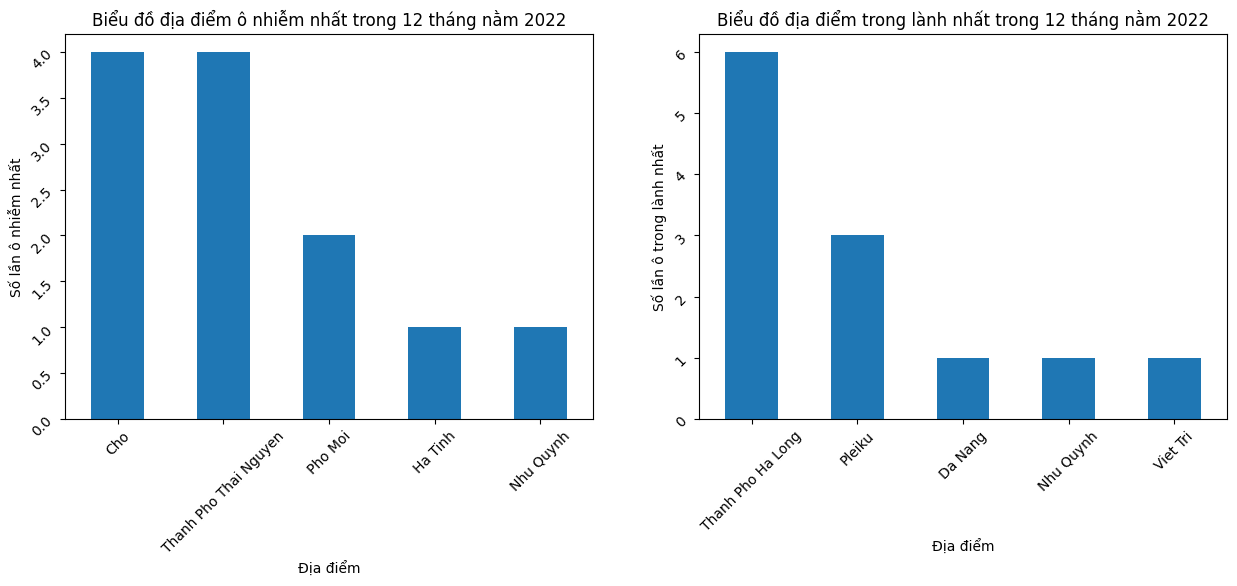

In [7]:
def air_city_VietNam(df, max = True): 
   if max == True: 
      idxCity = df.iloc[:, 3:16].idxmax()
   else:
      idxCity = df.iloc[:, 3:16].idxmin()
   idxCity_df = df.loc[idxCity.values].iloc[:, 1]
   city = pd.DataFrame(idxCity_df.values, index = idxCity.index.values, columns = ['City'])
   return city

max = air_city_VietNam(df_Vietnam)
min = air_city_VietNam(df_Vietnam, False)

max_2022 = max[1:]
min_2022 = min[1:]

city_max = max_2022.value_counts().reset_index().set_index('City')
city_min = min_2022.value_counts().reset_index().set_index('City')

fig, axes = plt.subplots(1, 2, figsize = (15, 5))

city_max.plot.bar(ax = axes[0])
city_min.plot.bar(ax = axes[1])

axes[0].title.set_text('Biểu đồ địa điểm ô nhiễm nhất trong 12 tháng nằm 2022')
axes[1].title.set_text('Biểu đồ địa điểm trong lành nhất trong 12 tháng nằm 2022')

axes[0].set_xlabel('Địa điểm')
axes[1].set_xlabel('Địa điểm')

axes[0].set_ylabel('Số lần ô nhiễm nhất')
axes[1].set_ylabel('Số lần ô trong lành nhất')

axes[0].legend().remove()
axes[1].legend().remove()

axes[0].tick_params(labelrotation = 45)
axes[1].tick_params(labelrotation = 45)

plt.show()

**NHẬN XÉT**
- Ta thấy có 2 địa điểm ô nhiễm nhiều nhất là Cho và thành phố Thái Nguyên.
- Ta thấy thành phố Hạ Long là thành phố có số lần đạ mức độ ô nhiễm thấp nhất trong 12 tháng nhiều nhất, nên có thể nói Hạ Long là một thành phố du lịch lý tưởng khi nói về môi trường trong lành.

**GIẢI THÍCH**
- Chủ yếu do người dân đốt rơm rạ sau thu hoạch lúa, đặc biệt vào chiều tối và sáng sớm. chủ yếu do người dân đốt rơm rạ sau thu hoạch lúa, đặc biệt vào chiều tối và sáng sớm tại Cho và Thái Nguyên.
- Tại Hạ Long có lẽ được thiên nhiên yêu mến, có nhiều cây và bóng mát làm cho không khí của Hạ Long phần nào được trong lành, đồng thời có chính quyền hỗ trợ giúp cho không khí Hạ Long tốt hơn.

# 3. Sự thay đổi của không khí của Việt Nam từ 2017 đến 2022

Lấy dữ liệu là các năm của `df` và lưu vào `year_df`

In [8]:
year_df = df_Vietnam[['Rank', 'City', 'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021']]

- Tính mức độ ô nhiễm không khí ở Việt Nam năm 2022 bằng cách tính trung bình cộng các tháng trong năm 2022.
- Sau đó thêm vào dataframe `year_df`

In [9]:
year_2022 = round(df_Vietnam.iloc[:, 4:16].mean(axis= 1), 1)
year_df.insert(7, '2022', year_2022, True)
# Để tính toán được đúng thì ta sẽ thay thế dữ liệu np.nan = 0
year_df = year_df.replace(np.nan, 0).set_index('City')
year_df.head()

,Rank,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,2022
City,,,,,,,
Pho Moi,285,0.0,0.0,0.0,0.0,36.9,37.5
Hanoi,300,45.8,40.8,46.9,37.9,36.2,36.2
Thanh Pho Thai Nguyen,214,0.0,0.0,0.0,0.0,40.8,43.2
Cho,235,0.0,0.0,0.0,0.0,39.3,39.8
Ha Tinh,473,0.0,0.0,0.0,33.4,30.0,28.4


Sắp xếp vị trí dữ liệu của các tỉnh theo bảng xếp hạng và đổi tên các cột thành năm.

In [10]:
year_df = year_df.sort_values('Rank').drop(['Rank'], axis = 1)
year_df.columns = ['2017', '2018', '2019', '2020', '2021', '2022']
year_df.head()

,2017,2018,2019,2020,2021,2022
City,,,,,,
Thanh Pho Thai Nguyen,0.0,0.0,0.0,0.0,40.8,43.2
Cho,0.0,0.0,0.0,0.0,39.3,39.8
Pho Moi,0.0,0.0,0.0,0.0,36.9,37.5
Hanoi,45.8,40.8,46.9,37.9,36.2,36.2
Ha Tinh,0.0,0.0,0.0,33.4,30.0,28.4


#### Top 5 địa điểm có mức độ ô nhiễm cao nhất tại Việt Nam

Dùng biểu đồ đường để biểu diễn sự thay đổi về chất lượng không khí giữa các năm của các địa điểm được cho là ô nhiễm nhất tại Việt Nam từ 2017 - 2022.

Giúp ta thấy rõ sự thay đổi giữa các năm hơn so với dùng biểu đồ cột hoặc biểu đồ khác.

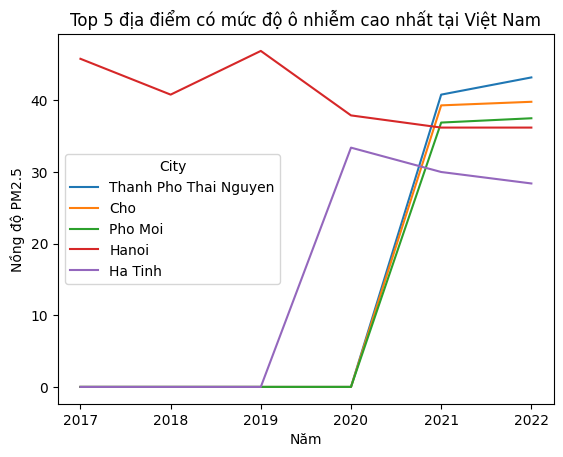

In [11]:
top5_polution_air_city = year_df.T.iloc[:, :5]
top5_polution_air_city.plot()
plt.title('Top 5 địa điểm có mức độ ô nhiễm cao nhất tại Việt Nam')
plt.xlabel('Năm')
plt.ylabel('Nồng độ PM2.5')
plt.show()

#### Top 5 địa điểm có mức độ ô nhiễm thấp nhất tại Việt Nam

Dùng biểu đồ đường để biểu diễn sự thay đổi về chất lượng không khí giữa các năm của các địa điểm được cho là trong lành nhất tại Việt Nam từ 2017 - 2022.

Giúp ta thấy rõ sự thay đổi giữa các năm hơn so với dùng biểu đồ cột hoặc biểu đồ khác.

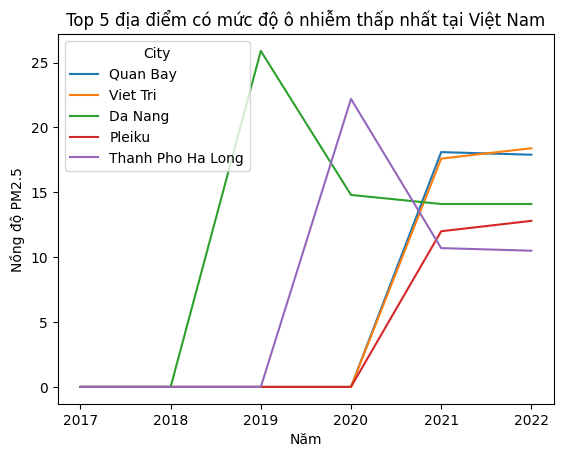

In [12]:
top5_fresh_air_city = year_df.T.iloc[:, 10:]
top5_fresh_air_city.plot()
plt.title('Top 5 địa điểm có mức độ ô nhiễm thấp nhất tại Việt Nam')
plt.xlabel('Năm')
plt.ylabel('Nồng độ PM2.5')
plt.show()

**NHẬN XÉT:**
- Ta thấy ở cả 2 hình thì mức độ ô nhiễm từ năm 2019 đến 2020, 2021 giảm khá rõ rệt.
- Năm 2021 đến 2022 thì có sự tăng nhẹ về mức độ ô nhiễm không khí.
- Hà Nội là thành phố được kiểm tra mức độ ô nhiễm từ khá sớm so với các địa điểm còn lại.

**GIẢI THÍCH:**
- Năm 2019, 2020 là thời kì Covid-19 hoành hành, ít người tham gia giao thông, công trình cũng ít được xây dựng nên mức độ ô nhiễm không khí giảm mạnh.
- Do đó đến 2022, nước ta bắt đầu hoạt động bình thường trở lại về vấn đề giao thông và xây dựng nên mức độ ô nhiễm cũng tăng nhẹ.

# LỢI ÍCH KHI TRẢ LỜI CÂU HỎI:
- Giúp ta biết được tháng nào trong năm không nên ra đường nhiều, nếu ra đường thì nên trang bị các phương pháp bảo vệ sức khỏe của bản thân như áo khoát, khẩu trang.
- Giúp ta có thể biết được địa điểm có khí hậu tốt ở Việt Nam, ta có thể chọn nơi ấy là địa điểm du lịch, nghỉ dưỡng cùng gia đình, bạn bè.
- Mức độ ô nhiễm của một địa điểm, từ đó đưa ra giải pháp khắc phục.
- Đánh giá được trong vòng 1 năm, thì mức độ ô nhiễm của địa điểm đó có thay đổi hay không, thay đổi tích cực hay tiêu cực.